# Lecture 2.4: Missing Data

## Application of EM in Missing Data  

Missing data is a common problem in data analysis. When we make estimation based on incomplete data, we need to be careful with the way we handle missing data.  

For example, if we want to estimate average income based on some survey results, and some of the income data is missing, can we make the estimation based on the observed income data alone?  

### Example  

We collected a set of data on annual spending on food and income from a targeted population, and we are interested in estimating the average income of that population. Here is the data:  

In [2]:
missingdata = read.csv("data/missingdata.csv")
head(missingdata)

,spending,income
1,12,103
2,11,NA
3,18,133
4,14,116
5,10,NA
6,14,119


In [7]:
missingdata

,spending,income
1,12,103
2,11,NA
3,18,133
4,14,116
5,10,NA
6,14,119
7,NA,132
8,12,103
9,16,126
10,11,NA


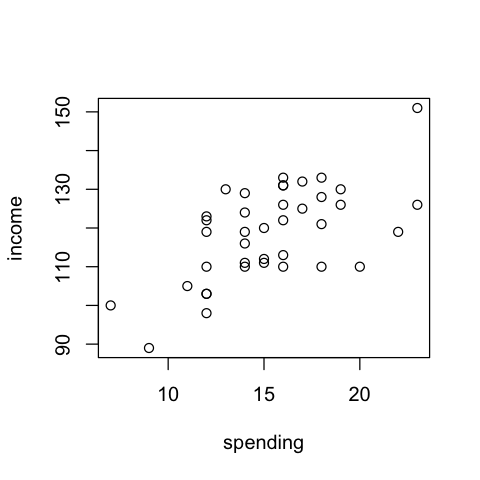

In [6]:
options(repr.plot.width = 4, repr.plot.height = 4)
with(missingdata, plot(spending, income))

In [3]:
summary(missingdata)

    spending         income     
 Min.   : 7.00   Min.   : 89.0  
 1st Qu.:12.00   1st Qu.:111.0  
 Median :14.00   Median :121.5  
 Mean   :14.52   Mean   :120.1  
 3rd Qu.:16.00   3rd Qu.:128.8  
 Max.   :23.00   Max.   :151.0  
 NA's   :7       NA's   :22     

**Quiz**: The sample average of income is 120.1, can we do better? How?  

### Multivariate Normal Distribution  

The multivariate normal distribution of a k-dimensional random vector $X = (X_1, X_2, \dots, X_k)$ can be written in the following notation:

$$X \sim N(\mathbf{\mu}, \mathbf{\Sigma}) $$  

Where,  

$\mathbf{\mu} = (\mu_1, \mu_2, \dots, \mu_k) = (E(X_1), E(X_2), \dots, E(X_k)) $  

and  

$\mathbf{\Sigma} = [Cov(X_i, X_j)], i, j = 1, 2, \dots, k $

The PDF of a multivariate Normal distribution has the following form:  

$$ f(\mathbf{x}) = (2 \pi)^{-\frac{k}{2}} |\mathbf{\Sigma}|^{-\frac{1}{2}}  e ^{ -\frac{1}{2} (\mathbf{x - \mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x - \mu})}$$  

**Quiz**: Y is bivariate Normal - a 2-dimensional multivariate Normal, $Y \sim N(\mathbf{\mu}, \mathbf{\Sigma}) $, with $\mu = (0, 3)$, and  

$$ \mathbf{\Sigma} =  
\begin{bmatrix}
    4 & 2 \\
    2 & 9
\end{bmatrix} $$  

Write out the PDF for Y, and evaluate it at $\mathbf{y} = c(2, 4)$.  

In the income example, we can try to model the data as bivariate Normal. 

Let $Y_{obs}$ be the set of observed data, and $Y_{mis}$ the missing data.  

$$ Y_{obs} = (y_{obs, 1}, y_{obs, 2}, \dots, y_{obs, n}) $$  

where $y_{obs, i}$ represents the set of variables observed for case $i$, $i = 1, 2, \dots, n$.  


The log likelihood based on the observed data is:  

$$ l(\mathbf{\mu, \Sigma} \ |\ Y_{obs}) = const - \frac{1}{2} \sum_{i = 1}^2 log \left( | \mathbf{\Sigma}_{obs, i}| \right) - \frac{1}{2} \sum_{i = 1}^n (y_{obs, i} - \mathbf{\mu}_{obs, i})^T \mathbf{\Sigma}_{obs, i}^{-1} (y_{obs, i} - \mathbf{\mu}_{obs, i}) $$  

where $\mathbf{\mu}_{obs, i}$ and $\mathbf{\Sigma}_{obs, i}$ are the mean and covariance matrix of the observed parts of $Y$ for observation $i$.  

To derive the EM algorithm for maximizing the log likelihood, the **E step** consists in calculating:    

$$E \left( \sum_{i = 1}^n y_{ij} \ | \ Y_{obs}, \theta^{(t)} \right) = \sum_{i = 1}^n y_{ij}^{(t)} \quad j = 1, 2$$  

$$E \left( \sum_{i = 1}^n y_{ij} y_{ik} \ | \ Y_{obs}, \theta^{(t)} \right) = \sum_{i = 1}^n (y_{ij}^{(t)}y_{ik}^{(t)} + c_{jki}^{(t)} ) \quad j, k = 1, 2$$  

where  

$$ y_{ij}^{(t)} = \begin{cases}
y_{ij} & \text{if } y_{ij} \text{ is observed} \\
E(y_{ij} \ | \ y_{obs, i}, \theta^{(t)}) & \text{ if} y_{ij} \text{ is missing} \\
\end{cases} $$  

$$ c_{jki}^{(t)} = \begin{cases}
0 & \text{if } y_{ij} \text{ or } y_{ik} \text{ is observed} \\
Cov(y_{ij}, y_{ik} \ | \ y_{obs, i}, \theta^{(t)}) & \text{ if} y_{ij} \text{ and } y_{ik} \text{ are missing} \\
\end{cases} $$  

So we are basically replacing the missing values of $y_{ij}$ with the conditional mean of $y_{ij}$ give the observed value $y_{obs, i}$ for that observation.  

**Quiz**: If $Y = (Y_1, Y_2) \sim N(\mathbf{\mu}, \mathbf{\Sigma})$ is a bivariate Normal random variable, with $\mu = (0, 3)$, and  

$$ \mathbf{\Sigma} =  
\begin{bmatrix}
    4 & 2 \\
    2 & 9
\end{bmatrix} $$  

What is $E(Y1 \ | \ Y2 = 4)$?

The **M step** computes the new estimates $\theta^{(t + 1)} $ of the parameters:  

$\mu_j^{(t + 1)} = \frac{1}{n} \sum_{i = 1}^n y_{ij}^{(t)} $  

$ \sigma_{jk}^{(t + 1)} = \frac{1}{n} \sum_{i = 1}^n \left[ (y_{ij}^{(t)} - \mu_j^{(t + 1)})(y_{ik}^{(t)} - \mu_k^{(t + 1)}) + c_{jki}^{(t)} \right] $

* For today's lab, you will implement this algorithm to estimate the average income from the sample data.  

## Maximum a Posteriori (MAP) Estimation

In Bayesian statistics, we treat the parameter $\theta$ as a random variable, and the posterior distribution of $\theta$ is calculated as:  

$$f(\theta \ | \ x) \sim f(x \ | \ \theta) f(\theta) $$  

where $f(x \ | \ \theta) = L( \theta \ | \ x)$ is the likelihood function of $\theta$ given $x$, and $f(\theta)$ is the prior distribution of $\theta$.  

We know that the MLE estimation is found by:  

$$ \hat{\theta}_{MLE} = argmax_{\theta} \ f(x \ |\ \theta) $$  

The MAP estimation estimates $\theta$ as the mode of the posterior distribution of $\theta$, i.e., by maximizing the posterior distribution:  

$$ \hat{\theta}_{MAP} = argmax_{\theta} \ f(\theta \ | \ x) = argmax_{\theta} \ f(x \ | \ \theta) f(\theta) $$